# What makes us happy?

This analisys shows:

In [1]:
#Libraries
import pandas as pd
import sklearn
import numpy as np
#Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
#Tools 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#World Happiness Report
df=pd.read_csv('felicidad.csv')
#df.query('country.str.contains("")', engine='python')

In [3]:
#Variables
X=df[['gdp','family','lifexp','freedom','generosity','corruption','dystopia']]
y=df[['score']]

In [4]:
#Splitting our training and test data
#Test size 25% and Random state 42
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
#Comparing size of the sets
print(len(X_train)==len(y_train))
print(len(X_test)==len(y_test))

True
True


In [6]:
#Initializing models and runing a predicction test
model_linear=LinearRegression().fit(X_train,y_train)
y_predict_linear=model_linear.predict(X_test)

model_lasso=Lasso(alpha=0.1).fit(X_train,y_train)
y_predict_lasso=model_lasso.predict(X_test)

model_ridge=Ridge(alpha=0.1).fit(X_train,y_train)
y_predict_ridge=model_ridge.predict(X_test)

model_elasticnet=ElasticNet(random_state=0,alpha=0.001).fit(X_train,y_train)
y_predict_elasticnet=model_elasticnet.predict(X_test)


In [7]:
print(model_linear.score(X_train,y_train),
model_lasso.score(X_train,y_train),
model_ridge.score(X_train,y_train),
model_elasticnet.score(X_train,y_train))

0.9999999456660376 0.8212244425488684 0.9999286738336923 0.9999004955727585


In [8]:
#Measuring the loss by model
linear_loss=mean_squared_error(y_test,y_predict_linear)
print('Linear Loss:',"%.10f" % float(linear_loss))
lasso_loss=mean_squared_error(y_test,y_predict_lasso)
print('Lasso Loss:',"%.10f" % float(lasso_loss))
ridge_loss=mean_squared_error(y_test,y_predict_ridge)
print('Ridge Loss:',"%.10f" % float(ridge_loss))
elasticnet_loss=mean_squared_error(y_test,y_predict_elasticnet)
print('Elastic Net Loss:',"%.10f" % float(elasticnet_loss))

Linear Loss: 0.0000000989
Lasso Loss: 0.2168563123
Ridge Loss: 0.0000854753
Elastic Net Loss: 0.0001177320


In [9]:
#Informing coefficients
coef=pd.DataFrame(data={'Linear':model_linear.coef_[0],'Lasso':model_lasso.coef_,'Ridge':model_ridge.coef_[0],'Elastic Net':model_elasticnet.coef_[0]},index=['gdp','family','lifexp','freedom','generosity','corruption','dystopia'])
coef=coef.T
coef

,gdp,family,lifexp,freedom,generosity,corruption,dystopia
Linear,1.000128,0.999946,0.999835,1.000034,1.000260,0.999771,0.999938
Lasso,1.465928,0.287463,0.000000,0.000000,0.000000,0.000000,0.657689
Ridge,1.013103,0.995706,0.978094,0.991834,0.966515,0.946297,0.995656
Elastic Net,1.015864,1.015864,1.015864,1.015864,1.015864,1.015864,1.015864


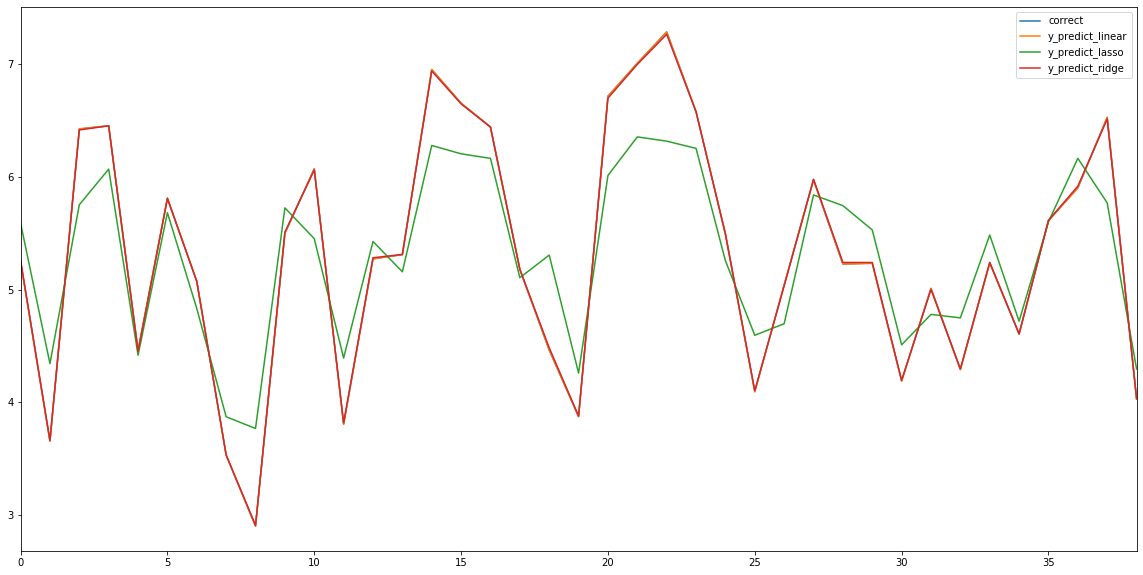

In [17]:
#Visual differences by model
df_test=pd.DataFrame(X_test)
df_test['y_predict_linear']=y_predict_linear
df_test['y_predict_lasso']=y_predict_lasso
df_test['y_predict_ridge']=y_predict_ridge
df_test['correct']=y_test
df_test=df_test.reset_index()
df_test=df_test.drop('index',axis=1)
df_test[['correct','y_predict_linear','y_predict_lasso','y_predict_ridge']].plot(figsize=[20,10])